In [1]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
from rf_classifier.transforms import ColorRescale, RandomColorRescale
import matplotlib.pyplot as plt
from rf_classifier.datasets import SyntheticRFsDataset
import numpy as np
from sklearn.manifold import TSNE

# SYNTHETIC

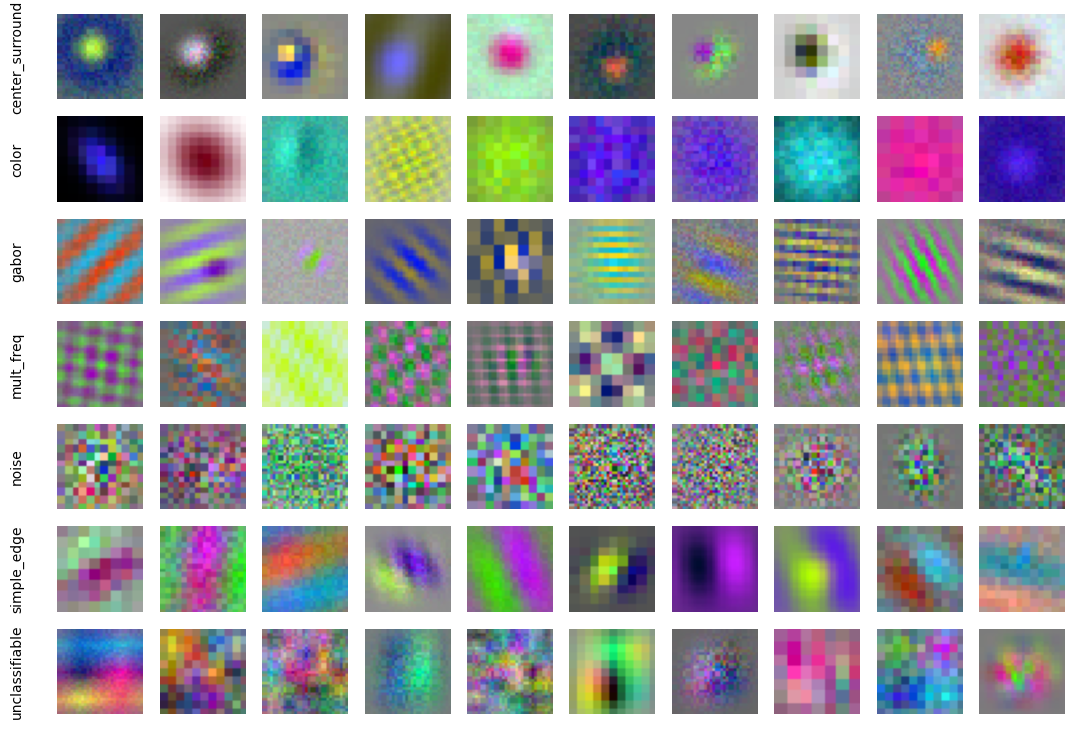

In [2]:
n_samples_per_class = 1000
disp_samples = 10
synth_data = SyntheticRFsDataset(num_samples_per_class=n_samples_per_class, transform=transforms.Compose([ColorRescale(-1, 1), transforms.Resize((32,32), interpolation=transforms.InterpolationMode.NEAREST, antialias=False)]))

fig, ax = plt.subplots(len(synth_data.classes), disp_samples, figsize=(disp_samples*1.3,len(synth_data.classes)*1.3))
for class_id, class_name in enumerate(synth_data.classes):
    ax[class_id, 0].set_ylabel(class_name)
    for sample in range(disp_samples):
        img =synth_data[class_id*n_samples_per_class+sample][0].movedim(0,2)
        ax[class_id, sample].imshow(ColorRescale()(img))
        if sample > 0:
            ax[class_id, sample].set_axis_off()
        else:
            ax[class_id, sample].tick_params(axis='both', which='both', bottom=False, left=False, labelcolor=(0,0,0,0))
            for spine in ax[class_id, sample].spines:
                ax[class_id, sample].spines[spine].set_visible(False)

## Definitions
fundamentally, all make use of some sort of gaussian:

$$
g(x_{pix},y_{pix}, \sigma_x, \sigma_y, \theta) = \exp\left(-0.5 \left(\frac{x_\theta^2}{\sigma_2} + \frac{y_\theta^2}{\sigma_2}\right)\right) \\
\text{with} \\
x_\theta= cos(\theta) x_{pix}  + sin(\theta) y_{pix}  \\
y_\theta= -sin(\theta) x_{pix} + cos(\theta) y_{pix} \\
$$

For simplicity, the pixel coordinates $x_{pix},y_{pix}$ are omitted in the following.
Also, most RF generations apply a gaussian multiplicatively in the end:
$$
g_\text{env} = g(\sigma_{x,\text{env}}, \sigma_{y,\text{env}}, \theta_\text{env})\\
\text{using} \\
\sigma_{x,\text{env}} \in \left[\frac{1}{8}\text{width},\frac{3}{4}\text{width}\right)\\
\sigma_{y,\text{env}} \in \left[\frac{1}{2}\sigma_{x,\text{env}},\frac{3}{2}\sigma_{x,\text{env}}\right)\\
\theta_\text{env} \in [0, \pi)
$$

### Center Surround
is modeled as a combination of two gaussians:
$$
c(\sigma_1, \sigma_2, \theta) = \left(\frac{\sigma_2}{\sigma_1}g(\sigma_1, \sigma_1, \theta) - g(\sigma_2, \sigma_2, \theta)\right) g_\text{env}
$$
Only circular cocentric RFs are considered for the moment (but with the non-aligned envelope applied in the end), which means the usage of a rotation unnecessary. So for the generation process, the ranges used are:
$$
\sigma_1 \in [1, \text{width} )\\
\sigma_2 \in [1, \text{height}) \\
\theta = 0
$$
### Gabor
### Mult Freq
### Noise
### Simple Edge
### Unclassifiable
-> weird combination of the previous

# HAND LABELED

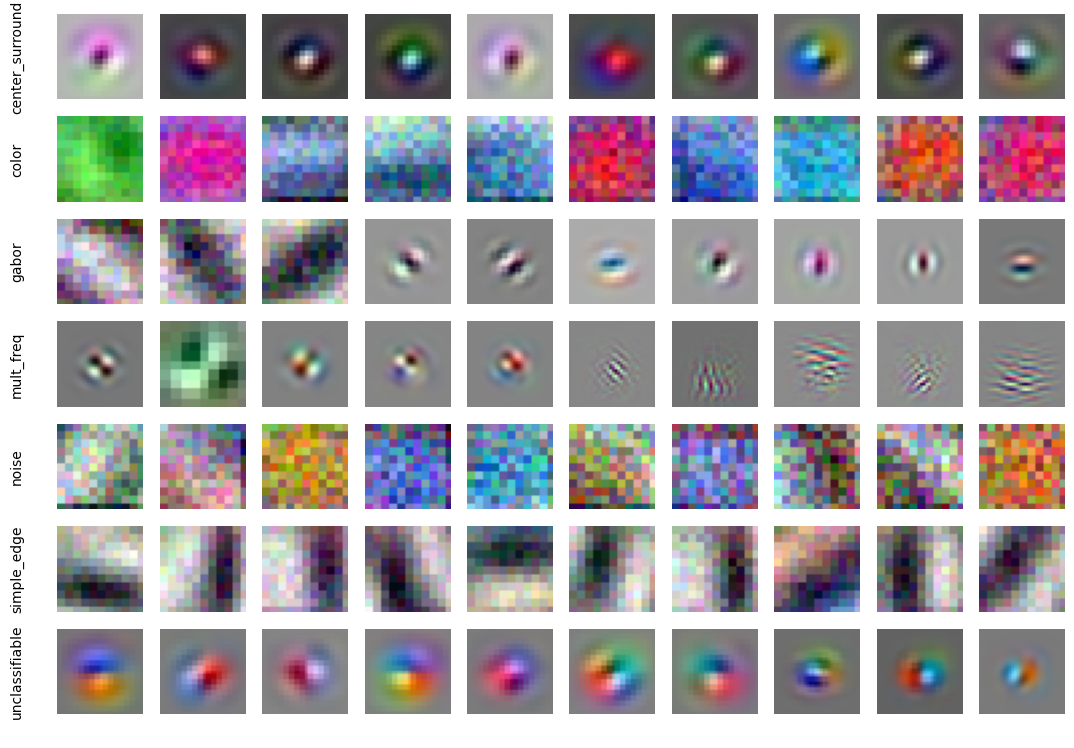

In [3]:
n_samples_per_class = 10
data = ImageFolder("../data/example_rfs2", transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((32,32), antialias=False, interpolation=transforms.InterpolationMode.NEAREST)]))
dataloader = DataLoader(data, batch_size=len(data.samples))
data_batch = next(iter(dataloader))[0]

fig, ax = plt.subplots(len(synth_data.classes), n_samples_per_class, figsize=(n_samples_per_class*1.3,len(synth_data.classes)*1.3))
for class_id, class_name in enumerate(synth_data.classes):
    ax[class_id, 0].set_ylabel(class_name)
    class_data = np.array(data.targets) == class_id
    class_imgs = data_batch[class_data].movedim(1,3)
    for sample in range(n_samples_per_class):
        if len(class_imgs) > sample:
            img = class_imgs[sample]
            ax[class_id, sample].imshow(ColorRescale()(img))
        if sample > 0:
            ax[class_id, sample].set_axis_off()
        else:
            ax[class_id, sample].tick_params(axis='both', which='both', bottom=False, left=False, labelcolor=(0,0,0,0))
            for spine in ax[class_id, sample].spines:
                ax[class_id, sample].spines[spine].set_visible(False)

## TSNE

In [4]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

### Synthetic

In [ ]:
synth_embed = TSNE(n_components=2).fit_transform(np.array([elem[0].flatten() for elem in synth_data]))

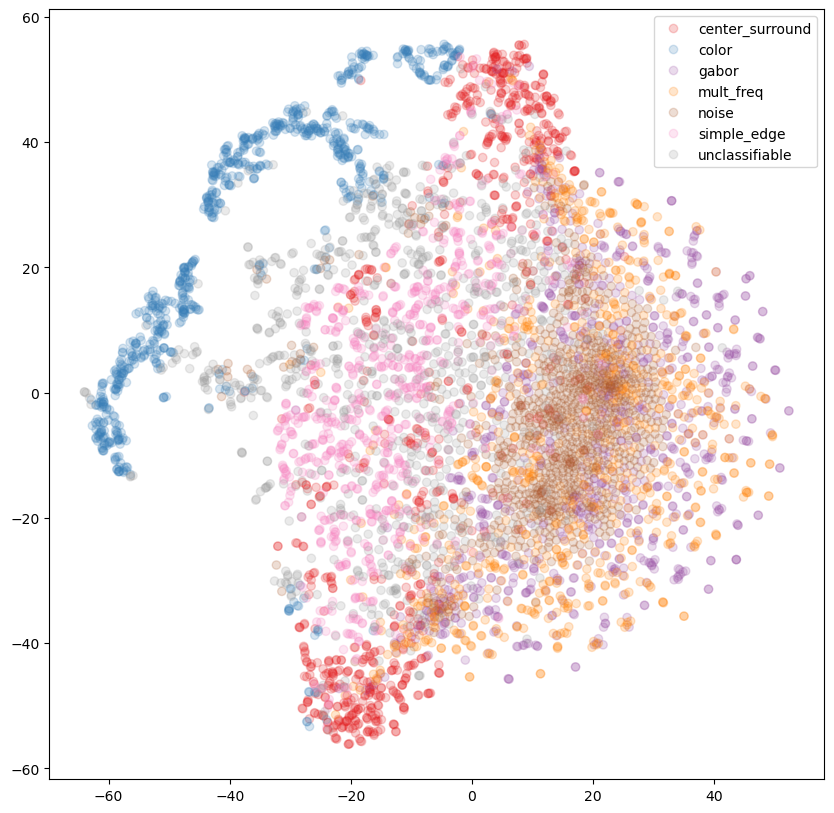

In [ ]:
subsets = [[0,1,2,3,4,5,6]]
fig, axes = plt.subplots(nrows=1, ncols=len(subsets),figsize=(len(subsets)*10,10))
if len(subsets)==1:
    axes = [axes]
for subset, ax in zip(subsets, axes):
    filter = np.array([elem[1] in subset for elem in synth_data])
    c = np.array([elem[1] for elem in synth_data])[filter]
    scatter = ax.scatter(synth_embed[filter].T[0],synth_embed[filter].T[1], c=c, cmap="Set1", alpha=0.2)
    ax.legend(labels=[synth_data.classes[i] for i in subset], handles=scatter.legend_elements()[0])
plt.show()

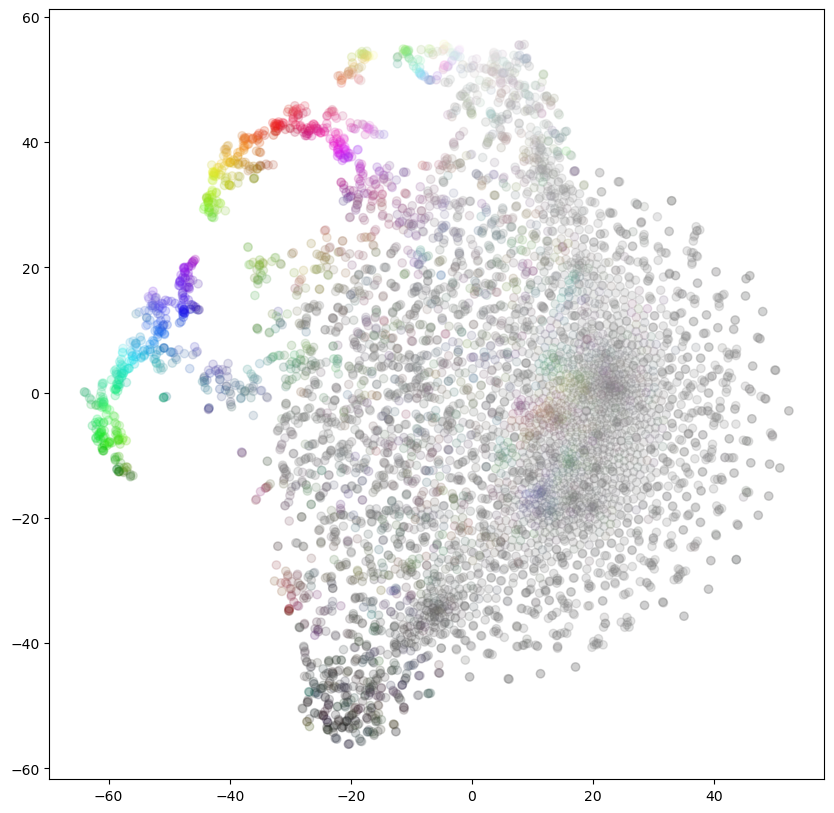

In [ ]:
subsets = [[0,1,2,3,4,5,6]]
fig, axes = plt.subplots(nrows=1, ncols=len(subsets),figsize=(len(subsets)*10,10))
if len(subsets)==1:
    axes = [axes]
for subset, ax in zip(subsets, axes):
    filter = np.array([elem[1] in subset for elem in synth_data])
    c = np.array([[np.mean((ColorRescale()(elem[0])).numpy(), axis=(1,2))] for elem in synth_data])[filter]
    scatter = ax.scatter(synth_embed[filter].T[0],synth_embed[filter].T[1], c=c, alpha=0.2)
    # ax.legend(labels=[synth_data.classes[i] for i in subset], handles=scatter.legend_elements()[0])
plt.show()

### Handlabeled

In [ ]:
embed = TSNE(n_components=2).fit_transform(np.array([elem[0].flatten() for elem in data]))

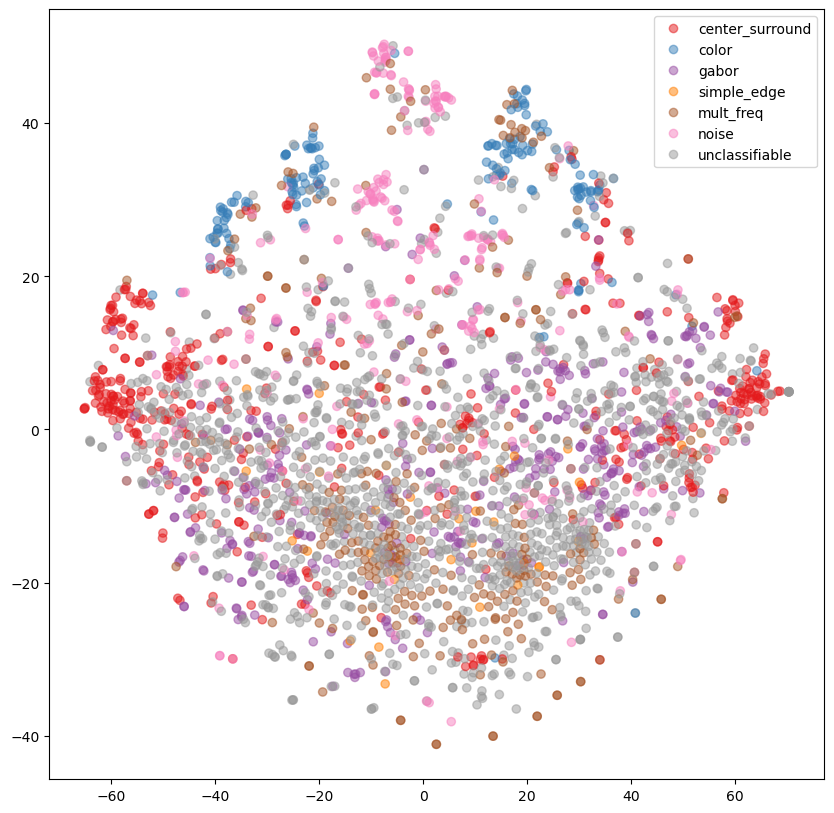

In [ ]:
subsets = [[0,1,2,5,3,4,6]]
fig, axes = plt.subplots(nrows=1, ncols=len(subsets),figsize=(len(subsets)*10,10))
if len(subsets)==1:
    axes = [axes]
for subset, ax in zip(subsets, axes):
    filter = np.array([elem[1] in subset for elem in data])
    c = np.array([elem[1] for elem in data])[filter]
    scatter = ax.scatter(embed[filter].T[0],embed[filter].T[1], c=c, cmap="Set1", alpha=0.5)
    ax.legend(labels=[synth_data.classes[i] for i in subset], handles=scatter.legend_elements()[0])
plt.show()

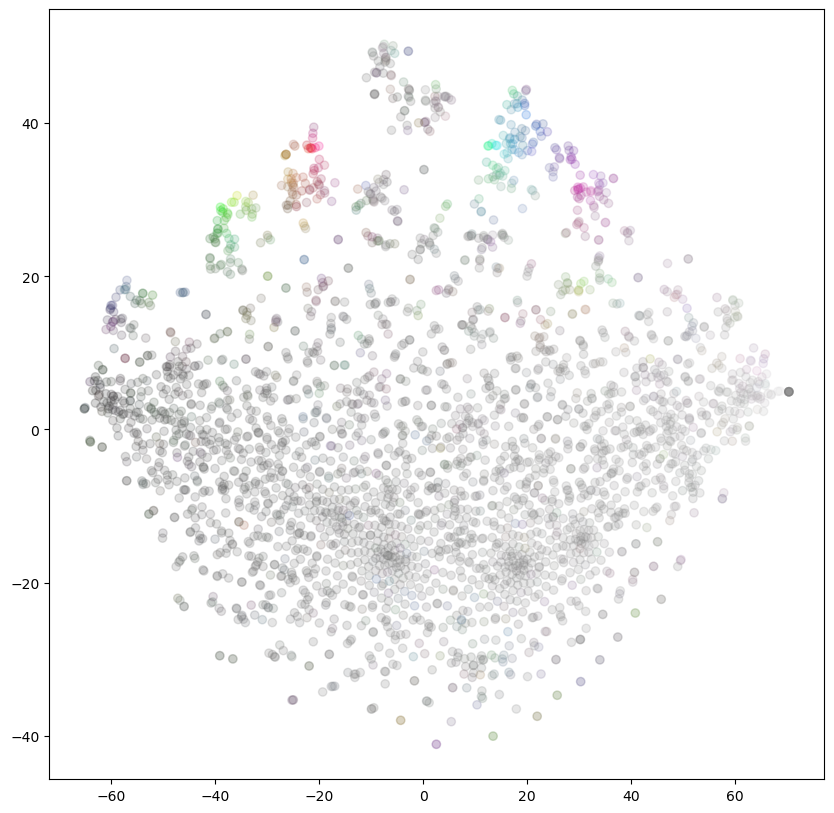

In [ ]:
subsets = [[0,1,2,3,4,5,6]]
fig, axes = plt.subplots(nrows=1, ncols=len(subsets),figsize=(len(subsets)*10,10))
if len(subsets)==1:
    axes = [axes]
for subset, ax in zip(subsets, axes):
    filter = np.array([elem[1] in subset for elem in data])
    c = np.array([[np.mean((ColorRescale()(elem[0])).numpy(), axis=(1,2))] for elem in data])[filter]
    scatter = ax.scatter(embed[filter].T[0],embed[filter].T[1], c=c, alpha=0.2)
    # ax.legend(labels=[synth_data.classes[i] for i in subset], handles=scatter.legend_elements()[0])
plt.show()

### Joint TSNE Analysis

In [ ]:
import torch

In [ ]:
base_transforms = transforms.Compose(
    [
        ColorRescale(-1, 1),
        transforms.Resize(
            (32, 32),
            antialias=False,
            interpolation=transforms.InterpolationMode.NEAREST,
        ),
    ]
)

data_transforms = transforms.Compose(
    [
        transforms.RandomInvert(),
        transforms.RandomAffine(
            degrees=180, translate=(0.1, 0.1), scale=(0.5, 2), shear=(-10, 10, -10, 10)
        ),
        RandomColorRescale(),
        base_transforms
    ]
)

data1 = ImageFolder(
    "../data/example_rfs",
    transform=transforms.Compose([transforms.ToTensor(), data_transforms]),
)
data2 = ImageFolder(
    "../data/example_rfs2",
    transform=transforms.Compose([transforms.ToTensor(), data_transforms]),
)
data = torch.utils.data.dataset.ConcatDataset([data1, data2])

synth_data = SyntheticRFsDataset(
    num_samples_per_class=len(data) * 2 // len(data1.classes),
    transform=data_transforms
)
joint_images = np.array([elem[0].flatten() for d in [synth_data, data] for elem in d])
joint_labels = np.array([elem[1] for d in [synth_data, data] for elem in d])
joint_embed = TSNE(n_components=2).fit_transform(joint_images)

In [ ]:
joint_images_unflattened = np.array([elem[0] for d in [synth_data, data] for elem in d])

In [ ]:
new_labels = joint_labels*2
new_labels[len(synth_data):]+=1
class_names = [class_name for sublist in [[ f"{class_name}_synth", class_name] for class_name in synth_data.classes] for class_name in sublist]

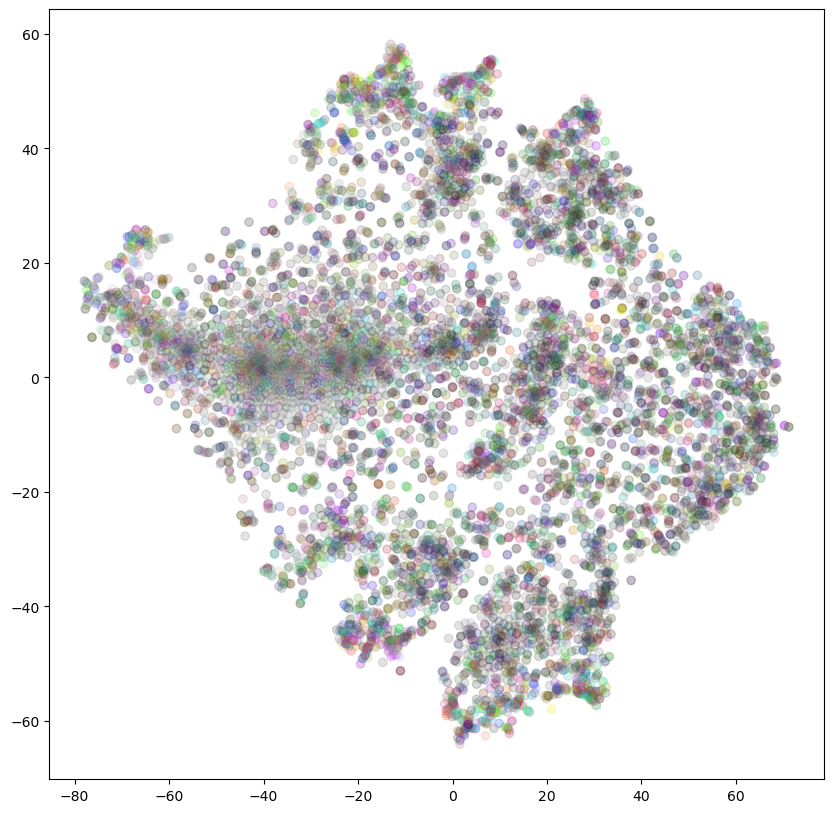

In [ ]:
subsets = [new_labels]
fig, axes = plt.subplots(nrows=1, ncols=len(subsets),figsize=(len(subsets)*10,10))
if len(subsets)==1:
    axes = [axes]
for subset, ax in zip(subsets, axes):
    filter = np.array([l in subset for l in new_labels])
    c = np.array([[np.mean(ColorRescale()(img), axis=(1,2))] for img in joint_images_unflattened])[filter]
    [filter]
    scatter = ax.scatter(joint_embed[filter].T[0],joint_embed[filter].T[1], c=c, alpha=0.2)
    # ax.legend(labels=[synth_data.classes[i] for i in subset], handles=scatter.legend_elements()[0])
plt.show()

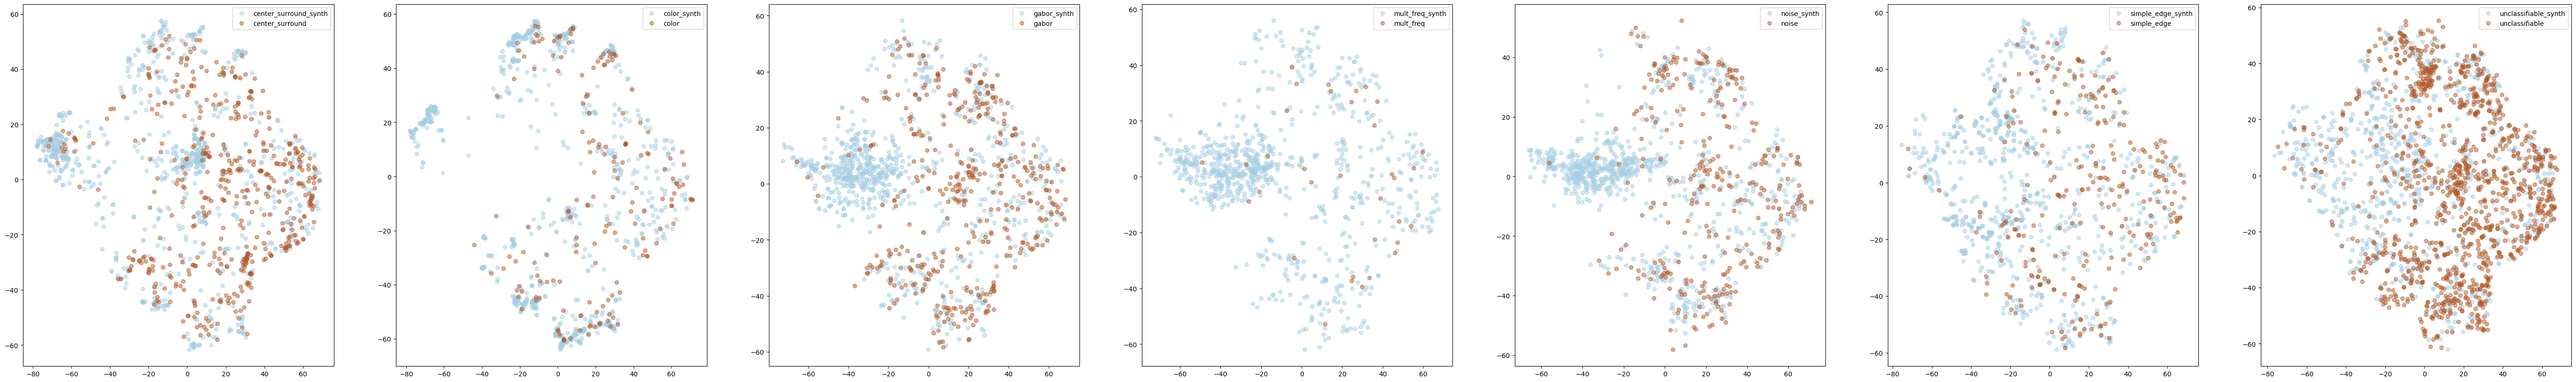

In [ ]:
subsets = [[i*2,i*2+1] for i in range(len(synth_data.classes))]
fig, axes = plt.subplots(nrows=1, ncols=len(subsets),figsize=(len(subsets)*10,10))
if len(subsets)==1:
    axes = [axes]
for subset, ax in zip(subsets, axes):
    filter = np.array([l in subset for l in new_labels])
    c = new_labels[filter]
    scatter = ax.scatter(joint_embed[filter].T[0],joint_embed[filter].T[1], c=c, alpha=0.5, cmap="Paired")
    ax.legend(labels=[class_names[i] for i in subset], handles=scatter.legend_elements()[0])
    # ax.set_xlim((-50,50))
    # ax.set_ylim((-50,50))
plt.show()